Found 3877 images belonging to 2 classes.
Found 969 images belonging to 2 classes.
Epoch 1/30


C:\Users\SNUC\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\SNUC\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - accuracy: 0.5927 - loss: 0.7126 - val_accuracy: 0.6708 - val_loss: 0.6411
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.5938 - loss: 0.6857 - val_accuracy: 0.7778 - val_loss: 0.6309
Epoch 3/30


C:\ProgramData\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


121/121 ━━━━━━━━━━━━━━━━━━━━ 39s 323ms/step - accuracy: 0.6840 - loss: 0.6055 - val_accuracy: 0.7125 - val_loss: 0.5706
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 354us/step - accuracy: 0.7188 - loss: 0.6310 - val_accuracy: 0.5556 - val_loss: 0.7064
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 39s 318ms/step - accuracy: 0.7161 - loss: 0.5647 - val_accuracy: 0.7542 - val_loss: 0.5087
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.6875 - loss: 0.5128 - val_accuracy: 1.0000 - val_loss: 0.4043
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 39s 321ms/step - accuracy: 0.7501 - loss: 0.5195 - val_accuracy: 0.7510 - val_loss: 0.5276
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.8125 - loss: 0.4349 - val_accuracy: 0.7778 - val_loss: 0.7487
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 38s 317ms/step - accuracy: 0.7602 - loss: 0.5069 - val_accuracy: 0.7719 - val_loss: 0.4869
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7812 - loss: 0.4413 - val_ac

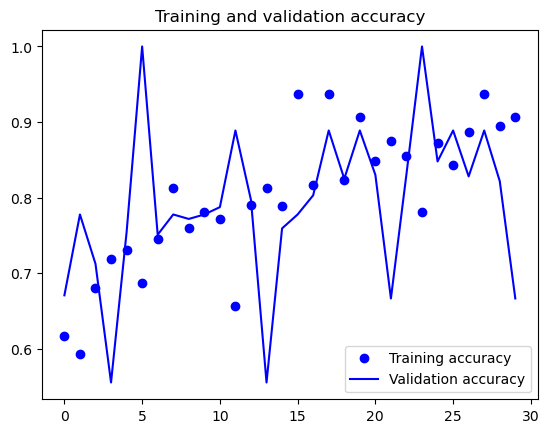

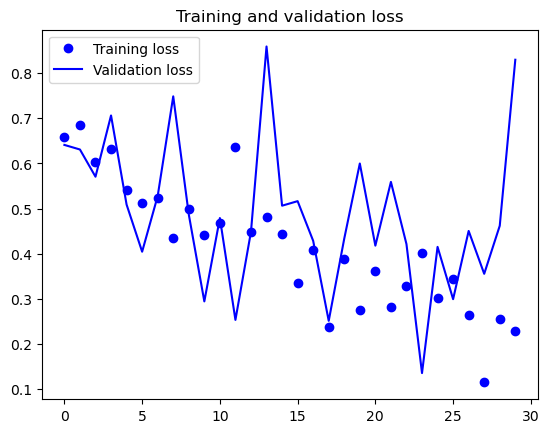

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Prediction: Good


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define paths
base_dir = r'C:\Users\SNUC\Downloads\archive\Lightweight Dataset for Maize Classification on Resource-Constrained Devices'
efficient_maize_dir = os.path.join(base_dir, 'EfficientMaize')
augmented_efficient_maize_dir = os.path.join(base_dir, 'Augmented EfficientMaize')

# Define data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

train_generator = datagen.flow_from_directory(
    efficient_maize_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'  # Set as training data
)

validation_generator = datagen.flow_from_directory(
    efficient_maize_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Set as validation data
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Making predictions on new images
from tensorflow.keras.preprocessing import image

img_path = img_path = r'C:\Users\SNUC\Downloads\archive\Lightweight Dataset for Maize Classification on Resource-Constrained Devices\EfficientMaize\good\good_data992.jpg'
  # Replace with the actual path to the new image
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

prediction = model.predict(img_tensor)
print(f"Prediction: {'Good' if prediction[0] > 0.5 else 'Bad'}")